Transaction  Analysis Project

. This script analyzes customer transaction data by cleaning the dataset,
  computing summary statistics, applying filters , and generating visualizations
  to gain meaningful insighjts using Pandas and Matplotlib.







In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
def load_data(file_name): #load a csv file into a pandas dataframe with error handlings.
    try:
      df = pd.read_csv(file_name)
      print('Data loaded successfully')
      return df

    except FileNotFoundError:
       print("Error: File not found.")

    except Exception as e:
      print('Error:',e)

In [ ]:
#The try-except block is used to handle errors while loading the csv.


In [ ]:
df =load_data("Transactions.csv.csv")

Data loaded successfully


In [ ]:
print(df)

      id    customer region   amount   category        date  is_premium
0      1        John  South   271.78     Sports  2025-08-13        True
1      2       Kevin  South      NaN  Furniture  2024-06-27        True
2      3  Jacqueline   East  3415.70      Books  2024-09-23       False
3      4    Nicholas  North      NaN  Groceries  2023-09-11       False
4      5    Jennifer   West  2893.02  Groceries  2024-03-02        True
..   ...         ...    ...      ...        ...         ...         ...
695  696      Sherry  North  2611.35   Clothing  2024-06-10        True
696  697      Thomas   East   476.24   Clothing  2024-02-23        True
697  698      Joseph  North   751.19  Groceries  2025-05-23        True
698  699       Susan  North  3969.44     Sports  2025-07-20        True
699  700      Steven  North  3066.80  Groceries  2024-03-04        True

[700 rows x 7 columns]





```
# Initial data exploration
```









In [ ]:
df.info   # Get dataset information (colunms,data,types,nullvalues)

<bound method DataFrame.info of       id    customer region   amount   category        date  is_premium
0      1        John  South   271.78     Sports  2025-08-13        True
1      2       Kevin  South      NaN  Furniture  2024-06-27        True
2      3  Jacqueline   East  3415.70      Books  2024-09-23       False
3      4    Nicholas  North      NaN  Groceries  2023-09-11       False
4      5    Jennifer   West  2893.02  Groceries  2024-03-02        True
..   ...         ...    ...      ...        ...         ...         ...
695  696      Sherry  North  2611.35   Clothing  2024-06-10        True
696  697      Thomas   East   476.24   Clothing  2024-02-23        True
697  698      Joseph  North   751.19  Groceries  2025-05-23        True
698  699       Susan  North  3969.44     Sports  2025-07-20        True
699  700      Steven  North  3066.80  Groceries  2024-03-04        True

[700 rows x 7 columns]>

In [ ]:
df.shape #check number of rows and columns

(700, 7)

In [ ]:
df.head()

,id,customer,region,amount,category,date,is_premium
0,1,John,South,271.78,Sports,2025-08-13,True
1,2,Kevin,South,NaN,Furniture,2024-06-27,True
2,3,Jacqueline,East,3415.70,Books,2024-09-23,False
3,4,Nicholas,North,NaN,Groceries,2023-09-11,False
4,5,Jennifer,West,2893.02,Groceries,2024-03-02,True


In [ ]:
# Data cleaning function

In [ ]:
df.isnull().sum()  #checking missing values in each column

,0
id,0
customer,0
region,0
amount,68
category,0
date,0
is_premium,0


In [ ]:
df['amount'].dtype

dtype('float64')

In [ ]:
df['amount'].mean()

np.float64(2493.308765822785)

In [ ]:
df['amount'] = df['amount'].fillna(df['amount'].mean()) # filling Nan value with mean

In [ ]:
df.dropna(subset=['date'],inplace=True) #Removing rows with missing values in date column

In [ ]:
df['date'] = pd.to_datetime(df['date']) #converting date column into datetime column

In [ ]:
df['is_premium'].dtype

dtype('bool')

In [ ]:
df['is_premium']=df['is_premium'].astype(int) #converting boolean column to integer(Ture=1, False=0)

In [ ]:
df.head(2) #checking code by top two rows

,id,customer,region,amount,category,date,is_premium
0,1,John,South,271.780000,Sports,2025-08-13,1
1,2,Kevin,South,2493.308766,Furniture,2024-06-27,1


In [ ]:
#Data Analysis

In [ ]:
def analyze_data(df):

 Amount_summary = df['amount'].describe()   #summary statistics for the 'amount' column
 print("\n Summary Statistics (Amount)")
 print(df['amount'].describe())

 unique_regions = df['region'].unique()     #finding unique region in the dataset
 print("\n Unique Regions:")
 print(df['region'].unique)

 category_spend = df.groupby('category')['amount'].sum()  #group data by category and calculate total spend per product category
 print("\n Total Spend by Category:")
 print(category_spend)
 return category_spend

In [ ]:
print (analyze_data(df))


 Summary Statistics (Amount)
count     700.000000
mean     2493.308766
std      1334.218125
min       105.660000
25%      1358.745000
50%      2493.308766
75%      3598.580000
max      4994.390000
Name: amount, dtype: float64

 Unique Regions:
<bound method Series.unique of 0      South
1      South
2       East
3      North
4       West
       ...  
695    North
696     East
697    North
698    North
699    North
Name: region, Length: 700, dtype: object>

 Total Spend by Category:
category
Books          232242.816424
Clothing       280967.815190
Electronics    271259.823829
Furniture      264512.810253
Groceries      271560.798892
Sports         192487.053829
Toys           232285.017658
Name: amount, dtype: float64
category
Books          232242.816424
Clothing       280967.815190
Electronics    271259.823829
Furniture      264512.810253
Groceries      271560.798892
Sports         192487.053829
Toys           232285.017658
Name: amount, dtype: float64


"This function performs exploratory data analysis ,
It provides summary statistics,unique value analysis,and group by on category "

In [ ]:
#Filtering data

In [ ]:
def filter_transactions(df,start_date=None,end_date=None,min_amount=None,max_amount=None):
    filtered_df = df.copy()  #create a copy of the original DtaFrame to avoid modifying it

    if start_date:
      filtered_df =filtered_df[filtered_df['date']>=start_date]
    if end_date:
      filtered_df=filtered_df[filtered_df['date']<=end_date]

    if min_amount:
      filtered_df=filtered_df[filtered_df['amount']>=min_amount]
    if max_amount:
      filtered_df=filtered_df[filtered_df['amount']<=max_amount]

    return filtered_df

In [ ]:
result = filter_transactions(
    df,
    start_date='2024-01-01',
    end_date ='2024-03-01',
    min_amount= 100,
    max_amount=500
)

In [ ]:
print(result)

      id   customer region  amount     category       date  is_premium
56    57    Madison   West  146.97  Electronics 2024-01-04           1
158  159     Thomas   East  127.87    Furniture 2024-02-22           1
470  471  Elizabeth   West  261.64        Books 2024-01-22           1
484  485      Traci   East  128.93        Books 2024-03-01           0
696  697     Thomas   East  476.24     Clothing 2024-02-23           1


"I first create a copy of the DataFrame , then apply filters onditionally based on user input, and finally return the filter dataset."

Visualization Histogram

---
"Create a histogram to visualize the distribution of transaction amounts."


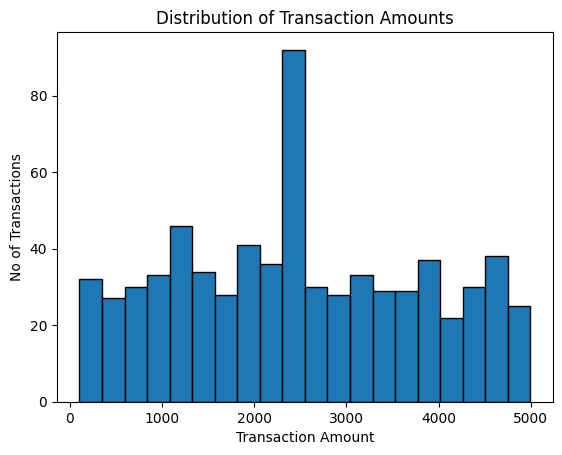

In [ ]:
plt.figure()
plt.hist(df['amount'],bins=20, edgecolor = 'black')
plt.xlabel('Transaction Amount' )
plt.ylabel('No of Transactions')
plt.title('Distribution of Transaction Amounts')
plt.show()

"Most transaction fall within a moderate amount range , with fewer high-value purchases."

Visualization Bar Chart

---

"Create a bar chart to show total spend per product category,"

---



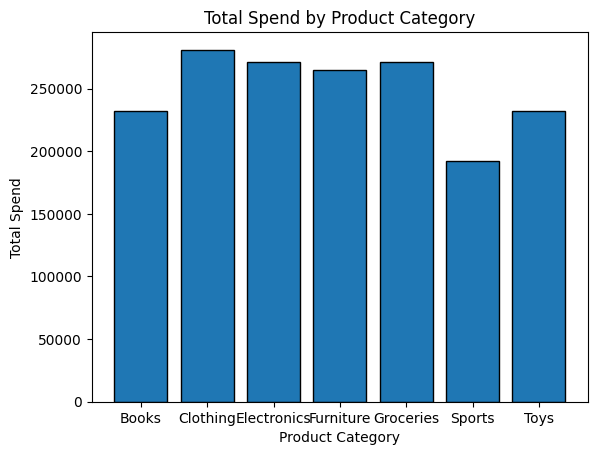

In [ ]:
plt.figure()
category_spend = df.groupby('category')['amount'].sum()
plt.bar(category_spend.index,category_spend.values , edgecolor = 'black')
plt.xlabel('Product Category')
plt.ylabel('Total Spend')
plt.title('Total Spend by Product Category')
plt.show()

"Spending is highest in clothing and electronics,while sports contribute the least to total revenue."

In [ ]:
#Line chart - Transaction Trend over Time

In [ ]:
df['date'] = pd.to_datetime(df['date'])

daily_spend = df.groupby('date')['amount'].sum()

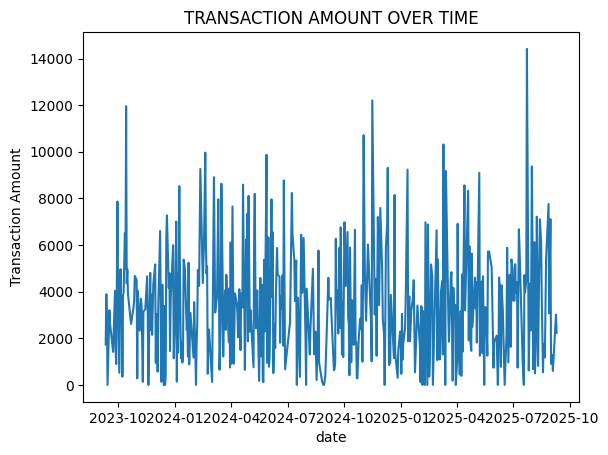

In [ ]:
plt.figure()
plt.plot(daily_spend.index,daily_spend.values)
plt.xlabel('date')
plt.ylabel('Transaction Amount')
plt.title('TRANSACTION AMOUNT OVER TIME')
plt.show()

"Transaction amounts vary over time with no fixed patterns dynamic customer spending behavior"

In [ ]:
#PIE CHART : Premium vs Non-Premium

In [ ]:
df['is_premium'] = df['is_premium'].astype(bool)

In [ ]:
customer_type = df['is_premium'].value_counts() #value_counts()-> how many premium and non-premium in a column

In [ ]:
print(customer_type)

is_premium
True     375
False    325
Name: count, dtype: int64


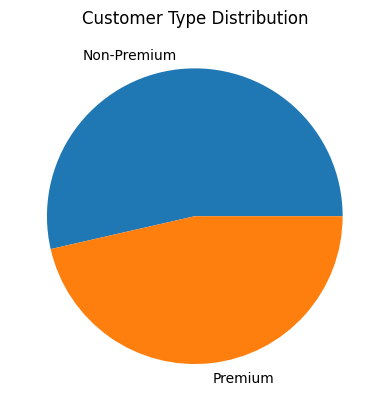

In [ ]:
plt.figure()
plt.pie(customer_type.values,labels=['Non-Premium','Premium'])
plt.title('Customer Type Distribution')
plt.show()

"Non -Premium customers dominate the customer base but Premium users contribute a substantial share."

Conclusion:


"Customer spending analysis shows strong category-wise revenue concentration , fluctuating transaction trends over time , and a majority of mid -range purchases with potential for premium customer growth."